# Проектна задача по Вовед во науката за податоци

---



## Виктор Мегленовски 191001 - ФИНКИ 2021/2022

---



Линк до податочно множество: https://www.kaggle.com/datasets/sovannt/world-bank-youth-unemployment

---



## 1.Импортирање на потребни библиотеки

In [306]:
!pip install catboost

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, f1_score
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM, Flatten, Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

---

## 2.Поврзување со Google Drive и вчитување на податоците

In [308]:
original_df=pd.read_csv("/content/drive/MyDrive/API_ILO_country_YU.csv")

In [401]:
print(original_df.head())

           Country Name Country Code       2010       2011       2012  \
0           Afghanistan          AFG  20.600000  20.900000  19.700001   
1                Angola          AGO  10.800000  10.700000  10.700000   
2               Albania          ALB  25.799999  27.000000  28.299999   
3            Arab World          ARB  25.022214  28.117516  29.113212   
4  United Arab Emirates          ARE   9.800000   9.800000   9.800000   

        2013       2014  
0  21.100000  20.799999  
1  10.600000  10.500000  
2  28.700001  29.200001  
3  29.335306  29.704569  
4   9.900000  10.000000  


In [402]:
df=original_df.copy()

In [403]:
print(df.head())

           Country Name Country Code       2010       2011       2012  \
0           Afghanistan          AFG  20.600000  20.900000  19.700001   
1                Angola          AGO  10.800000  10.700000  10.700000   
2               Albania          ALB  25.799999  27.000000  28.299999   
3            Arab World          ARB  25.022214  28.117516  29.113212   
4  United Arab Emirates          ARE   9.800000   9.800000   9.800000   

        2013       2014  
0  21.100000  20.799999  
1  10.600000  10.500000  
2  28.700001  29.200001  
3  29.335306  29.704569  
4   9.900000  10.000000  


*Ги отстрануваме првите 2 колони бидејќи не ни даваат никакво семантичко значење во врска со проблемот.*

In [404]:
df.drop(['Country Name', 'Country Code'], axis = 1,inplace=True)

In [405]:
print(df.head())

        2010       2011       2012       2013       2014
0  20.600000  20.900000  19.700001  21.100000  20.799999
1  10.800000  10.700000  10.700000  10.600000  10.500000
2  25.799999  27.000000  28.299999  28.700001  29.200001
3  25.022214  28.117516  29.113212  29.335306  29.704569
4   9.800000   9.800000   9.800000   9.900000  10.000000


In [406]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2010    219 non-null    float64
 1   2011    219 non-null    float64
 2   2012    219 non-null    float64
 3   2013    219 non-null    float64
 4   2014    219 non-null    float64
dtypes: float64(5)
memory usage: 8.7 KB
None


---

## 3.Дескриптивни статистики за променливите
*Сите променливи се од непрекинат тип*

In [315]:
print('Mean')
print(df.mean())

Mean
2010    17.892957
2011    17.902713
2012    18.148142
2013    18.100429
2014    17.943539
dtype: float64


In [316]:
print('Median')
print(df.median())

Median
2010    14.900000
2011    14.523908
2012    14.400000
2013    14.100000
2014    14.124300
dtype: float64


In [317]:
print('Standard deviation')
print(df.std())

Standard deviation
2010    10.540099
2011    10.887558
2012    11.430862
2013    11.674366
2014    11.554674
dtype: float64


In [318]:
print('Minimum')
print(df.min())

Minimum
2010    0.7
2011    0.7
2012    0.5
2013    0.7
2014    0.7
dtype: float64


In [319]:
print('Maximum')
print(df.max())

Maximum
2010    57.200001
2011    57.099998
2012    61.700001
2013    58.000000
2014    57.900002
dtype: float64


In [320]:
print('Quantiles')
print(df.quantile([.1, .25, .5, .75], axis = 0)) 

Quantiles
       2010       2011       2012       2013       2014
0.10   7.04   7.380000   6.720000   6.540000   6.660000
0.25  10.60  10.410530  10.500000  10.490677  10.500000
0.50  14.90  14.523908  14.400000  14.100000  14.124300
0.75  23.00  23.200001  24.616293  23.435561  23.310668


---

## 4.Визуелизација на податоците

### 4.1.Дистрибуција на променливите

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59acb52e50>,
      dtype=object)

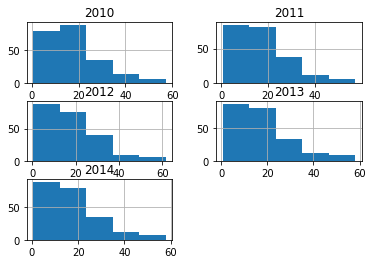

In [321]:
df.hist(bins = 5)

### 4.2.Тренд низ времето

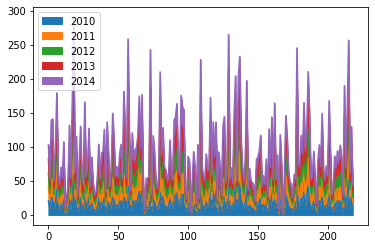

In [322]:
df.plot.area()

### 4.3.Врска помеѓу променливите

#### 2010 и 2011

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

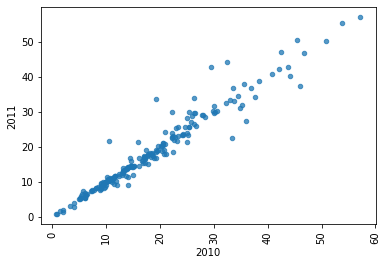

In [323]:
fig = plt.figure()
df.plot.scatter(x= '2010', y = '2011', alpha = 0.75,rot=0)
plt.xticks(rotation=90)

#### 2011 и 2012

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

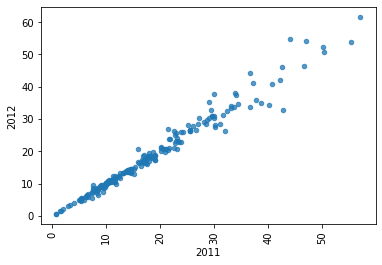

In [324]:
fig = plt.figure()
df.plot.scatter(x= '2011', y = '2012', alpha = 0.75,rot=0)
plt.xticks(rotation=90)

#### 2012 и 2013

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

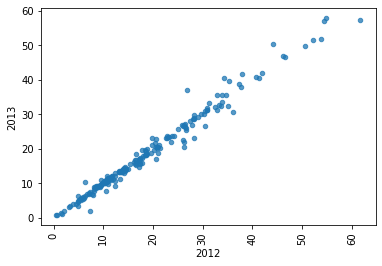

In [325]:
fig = plt.figure()
df.plot.scatter(x= '2012', y = '2013', alpha = 0.75,rot=0)
plt.xticks(rotation=90)

#### 2013 и 2014

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

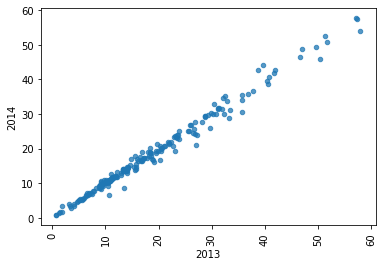

In [326]:
fig = plt.figure()
df.plot.scatter(x= '2013', y = '2014', alpha = 0.75,rot=0)
plt.xticks(rotation=90)

*Може да заклучиме дека помеѓу сите парови од соседни години постои јака линеарна зависност со коефициент блиску до 1*

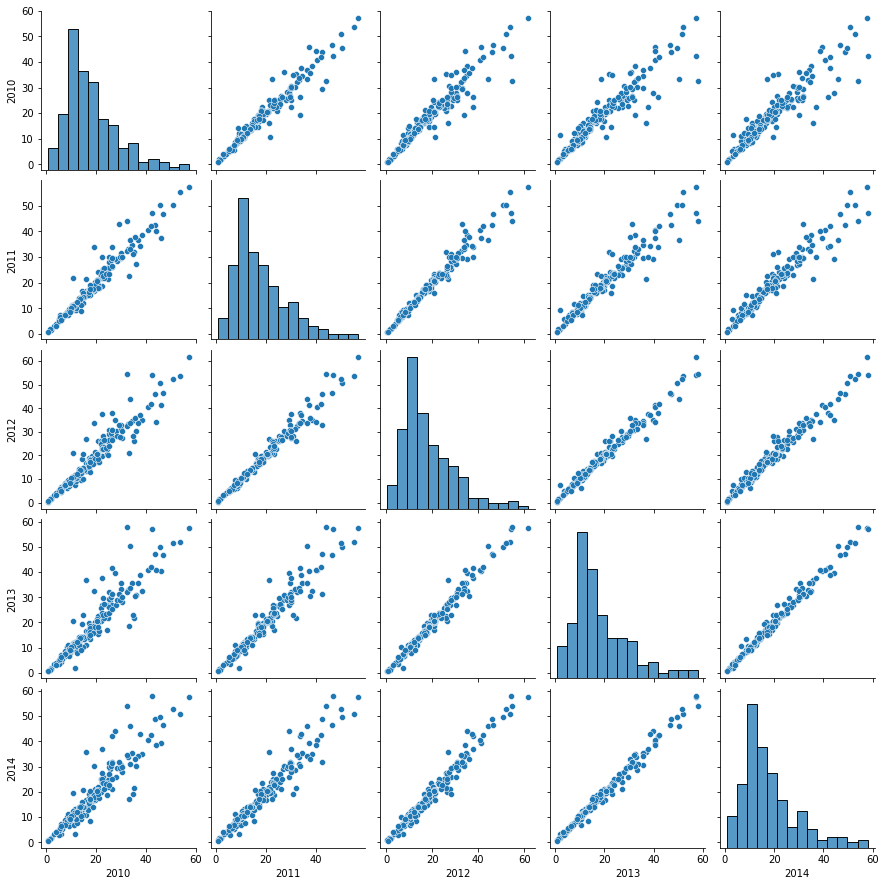

In [327]:
sns.pairplot(df)

---

## 5.Справување со вредности кои недостасуваат

Најпрво правиме проверка дали постојат вредности кои недостасуваат во таргет променливата, доколку постојат такви вредности, истите записи ги отстрануваме.

In [407]:
missing_values = df.isnull().sum()
percentage = 100 * df.isnull().sum() / len(df)
missing_values_table = pd.concat([missing_values, percentage], axis=1)
missing_values_table.columns = ['Num. of missing values','% of missing values']
print(missing_values_table)

      Num. of missing values  % of missing values
2010                       0                  0.0
2011                       0                  0.0
2012                       0                  0.0
2013                       0                  0.0
2014                       0                  0.0


Како што можеме да заклучиме, во податоците не постојат вредности кои недостасуваат.

Исто така немаме категориски променливи, па нема потреба да правиме енкодирање на истите.

---

## 6.Поделба на податоците за тренирање и за тестирање

In [329]:
X_train_original, X_test_original, Y_train_original, Y_test_original = train_test_split(df[df.columns[:-1]],  df['2014'], test_size=0.2)

Правиме скалирање на вредностите

In [330]:
scaler = StandardScaler()
scaler.fit(X_train_original)

X_train_original = scaler.transform(X_train_original)
X_test_original = scaler.transform(X_test_original)

In [331]:
matrix=[]

In [332]:
def make_copies():
  return X_train_original.copy(), X_test_original.copy(), Y_train_original.copy(), Y_test_original.copy()

*Горната функција ќе се користи секогаш кога ќе имаме потреба да направиме копија од податоците онака како што сме ги поделиле првиот пат*

---

## 7.Модел со линеарна регресија

In [333]:
X_train, X_test, Y_train, Y_test=make_copies()

In [334]:
model = LinearRegression().fit(X_train, Y_train)

In [335]:
y_pred = model.predict(X_test)
y_pred

array([16.53865385, 35.28083688,  5.59525541, 13.22126889,  9.79714022,
       23.51590577, 10.06735085, 13.1759868 , 30.64204975, 12.84062058,
        7.13211111,  8.20513145,  5.95386066,  9.80776417, 30.55514694,
       13.80610334,  1.48400931, 28.30065383, 23.40672013, 18.14601188,
       28.49265619, 19.52144076, 26.67706307, 10.40629802, 13.96456371,
        9.33038415, 35.23636052, 19.46817511, 32.80406134, 14.09424033,
       11.14349099, 16.44067166, 13.35699666, 10.59319382,  4.15890669,
        1.2160964 , 41.63318911, 40.55985646,  7.80358369, 22.09691099,
        9.21670467, 18.80343432, 10.93321278, 10.5112536 ])

In [336]:
print('R^2 Score: ', r2_score(Y_test,y_pred))

R^2 Score:  0.9910553470777943


In [337]:
print("Mean squared error: ",mean_squared_error(Y_test,y_pred))

Mean squared error:  0.9565766251911539


In [338]:
matrix.append(["Линеарна регресија",r2_score(Y_test,y_pred).astype(float),mean_squared_error(Y_test,y_pred)])

*Овој модел дава одлични резултати*

---

## 8.Модел со полиномна регресија

### 8.1.Полиномна регресија со степен 4

In [339]:
X_train, X_test, Y_train, Y_test=make_copies()

In [340]:
poly_reg=PolynomialFeatures(4)
X_train_poly=poly_reg.fit_transform(X_train)
poly_reg.fit(X_train_poly,Y_train)

lin_reg=LinearRegression()
lin_reg.fit(X_train_poly,Y_train)

X_test_poly=poly_reg.fit_transform(X_test)
y_pred=lin_reg.predict(X_test_poly)

training_score=mean_squared_error(Y_train, lin_reg.predict(X_train_poly))
test_score=mean_squared_error(Y_test,y_pred)

In [341]:
print('R^2 Score: ', r2_score(Y_test,y_pred))

R^2 Score:  -47.6739351631383


In [342]:
print("Mean squared error: ",test_score)

Mean squared error:  5205.3834886693485


In [343]:
matrix.append(["Полиномна регресија со степен 4",r2_score(Y_test,y_pred).astype(float),mean_squared_error(Y_test,y_pred)])

*Овој модел не дава добри резултати*

---

### 8.2.Полиномна регресија со степен 2

In [344]:
X_train, X_test, Y_train, Y_test=make_copies()

In [345]:
poly_reg=PolynomialFeatures(2)
X_train_poly=poly_reg.fit_transform(X_train)
poly_reg.fit(X_train_poly,Y_train)

lin_reg=LinearRegression()
lin_reg.fit(X_train_poly,Y_train)

X_test_poly=poly_reg.fit_transform(X_test)
y_pred=lin_reg.predict(X_test_poly)

training_score=mean_squared_error(Y_train, lin_reg.predict(X_train_poly))
test_score=mean_squared_error(Y_test,y_pred)

In [346]:
print('R^2 Score: ', r2_score(Y_test,y_pred))

R^2 Score:  0.9670140517921552


In [347]:
print("Mean squared error: ",test_score)

Mean squared error:  3.5276480026470707


In [348]:
matrix.append(["Полиномна регресија со степен 2",r2_score(Y_test,y_pred).astype(float),mean_squared_error(Y_test,y_pred)])

*Овој модел дава добри резултати*

---

## 9.Модел со XGBoost

In [349]:
X_train, X_test, Y_train, Y_test=make_copies()

In [350]:
model=XGBRegressor(objective ='reg:linear',
	colsample_bytree = 0.2,
	learning_rate = 0.5,
	max_depth = 4,
	alpha = 5,
	n_estimators = 5)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
test_score=mean_squared_error(Y_test,y_pred)

[17:07:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [351]:
print('R^2 Score: ', r2_score(Y_test,y_pred))

R^2 Score:  0.9531358366786692


In [352]:
print("Mean squared error: ",test_score)

Mean squared error:  5.011839316988365


In [353]:
matrix.append(["XGBoost",r2_score(Y_test,y_pred).astype(float),mean_squared_error(Y_test,y_pred)])

*Овој модел дава солидни резултати*

---

## 10.Модел со LightGBM

In [354]:
X_train, X_test, Y_train, Y_test=make_copies()

In [355]:
from lightgbm import LGBMRegressor
model=LGBMRegressor(n_estimators = 100)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
test_score=mean_squared_error(Y_test,y_pred)

In [356]:
print('R^2 Score: ', r2_score(Y_test,y_pred))

R^2 Score:  0.9481200048603692


In [357]:
print("Mean squared error: ",test_score)

Mean squared error:  5.548252246031639


In [358]:
matrix.append(["LightGBM",r2_score(Y_test,y_pred).astype(float),mean_squared_error(Y_test,y_pred)])

*Овој модел дава солидни резултати*

---

## 11.Модел со CatBoost

In [359]:
X_train, X_test, Y_train, Y_test=make_copies()

In [360]:
model = CatBoostRegressor(iterations=500,
	learning_rate=0.05,
        depth=10,
        eval_metric='RMSE',
        random_seed = 42,
        bagging_temperature = 0.2,
        od_type='Iter',
        metric_period = 50,
        od_wait=20)
model.fit(X_train, Y_train)
pred = model.predict(X_test)
test_score=mean_squared_error(Y_test,y_pred)

0:	learn: 11.3735896	total: 13.7ms	remaining: 6.83s
50:	learn: 2.4151251	total: 375ms	remaining: 3.3s
100:	learn: 1.3066763	total: 732ms	remaining: 2.89s
150:	learn: 0.9758470	total: 1.06s	remaining: 2.45s
200:	learn: 0.8153665	total: 1.39s	remaining: 2.07s
250:	learn: 0.6811388	total: 1.72s	remaining: 1.71s
300:	learn: 0.5894983	total: 2.04s	remaining: 1.35s
350:	learn: 0.5103431	total: 2.37s	remaining: 1s
400:	learn: 0.4406168	total: 2.67s	remaining: 658ms
450:	learn: 0.3890183	total: 2.97s	remaining: 323ms
499:	learn: 0.3417550	total: 3.28s	remaining: 0us


In [361]:
print('R^2 Score: ', r2_score(Y_test,y_pred))

R^2 Score:  0.9481200048603692


In [362]:
print("Mean squared error: ",test_score)

Mean squared error:  5.548252246031639


In [363]:
matrix.append(["CatBoost",r2_score(Y_test,y_pred).astype(float),mean_squared_error(Y_test,y_pred)])

*Овој модел дава слично добри резултати како и претходните.*

---

## 12.Модели со невронски мрежи

### 12.1.Прв модел

In [364]:
X_train, X_test, Y_train, Y_test=make_copies()

In [365]:
model = Sequential()

model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='linear'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=10, batch_size=10,  verbose=1, validation_split=0.2)
y_pred = model.predict(X_test)
test_score=mean_squared_error(Y_test,y_pred)

Epoch 1/10
14/14 [==============================] - 1s 16ms/step - loss: 330.1874 - val_loss: 148.9009
Epoch 2/10
14/14 [==============================] - 0s 5ms/step - loss: 116.9269 - val_loss: 49.2527
Epoch 3/10
14/14 [==============================] - 0s 5ms/step - loss: 78.0457 - val_loss: 50.3760
Epoch 4/10
14/14 [==============================] - 0s 7ms/step - loss: 61.1420 - val_loss: 27.7927
Epoch 5/10
14/14 [==============================] - 0s 7ms/step - loss: 35.1721 - val_loss: 15.0901
Epoch 6/10
14/14 [==============================] - 0s 6ms/step - loss: 18.7570 - val_loss: 6.5911
Epoch 7/10
14/14 [==============================] - 0s 6ms/step - loss: 9.4966 - val_loss: 3.2239
Epoch 8/10
14/14 [==============================] - 0s 6ms/step - loss: 5.3260 - val_loss: 3.0326
Epoch 9/10
14/14 [==============================] - 0s 7ms/step - loss: 4.0234 - val_loss: 3.4047
Epoch 10/10
14/14 [==============================] - 0s 6ms/step - loss: 3.4479 - val_loss: 4.4895


In [366]:
y_pred = model.predict(X_test)

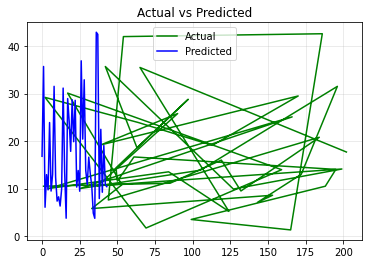

In [367]:
plt.plot(Y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [368]:
print("R^2 score: ", r2_score(Y_test,y_pred))

R^2 score:  0.9858672682163825


In [369]:
print("Mean squared error: ",test_score)

Mean squared error:  1.5114103355248778


In [370]:
matrix.append(["Невронска мрежа #1",r2_score(Y_test,y_pred).astype(float),mean_squared_error(Y_test,y_pred)])

*Овој модел дава солидни резултати*

---

### 12.2.Втор модел

In [371]:
X_train, X_test, Y_train, Y_test=make_copies()

In [372]:
model = Sequential()

model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2, input_shape=(256,)))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=30, batch_size=20,  verbose=1, validation_split=0.2)
y_pred = model.predict(X_test)
test_score=mean_squared_error(Y_test,y_pred)

Epoch 1/30
7/7 [==============================] - 1s 26ms/step - loss: 444.0495 - val_loss: 408.4590
Epoch 2/30
7/7 [==============================] - 0s 6ms/step - loss: 377.5623 - val_loss: 305.3311
Epoch 3/30
7/7 [==============================] - 0s 6ms/step - loss: 245.6134 - val_loss: 158.7994
Epoch 4/30
7/7 [==============================] - 0s 7ms/step - loss: 119.9106 - val_loss: 57.6062
Epoch 5/30
7/7 [==============================] - 0s 6ms/step - loss: 88.4978 - val_loss: 49.9743
Epoch 6/30
7/7 [==============================] - 0s 6ms/step - loss: 78.5773 - val_loss: 35.5146
Epoch 7/30
7/7 [==============================] - 0s 6ms/step - loss: 59.8658 - val_loss: 35.7939
Epoch 8/30
7/7 [==============================] - 0s 6ms/step - loss: 53.5467 - val_loss: 28.6432
Epoch 9/30
7/7 [==============================] - 0s 9ms/step - loss: 42.4716 - val_loss: 20.9596
Epoch 10/30
7/7 [==============================] - 0s 7ms/step - loss: 33.1474 - val_loss: 15.3638
Epoch 11/30

In [373]:
y_pred = model.predict(X_test)

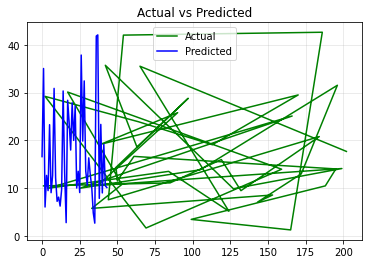

In [374]:
plt.plot(Y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [375]:
print("R^2 score: ", r2_score(Y_test,y_pred))

R^2 score:  0.9859833873914288


In [376]:
print("Mean squared error: ",test_score)

Mean squared error:  1.4989920908426309


In [377]:
matrix.append(["Невронска мрежа #2",r2_score(Y_test,y_pred).astype(float),mean_squared_error(Y_test,y_pred)])

*Овој модел дава добри резултати*

---

### 12.3.Трет модел

In [378]:
X_train, X_test, Y_train, Y_test=make_copies()

In [379]:
model = Sequential()

model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2, input_shape=(128,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(812, activation='relu'))
model.add(Dropout(0.2, input_shape=(512,)))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=50, batch_size=20,  verbose=1, validation_split=0.2)
y_pred = model.predict(X_test)
test_score=mean_squared_error(Y_test,y_pred)

Epoch 1/50
7/7 [==============================] - 1s 29ms/step - loss: 440.1865 - val_loss: 393.7437
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 332.2568 - val_loss: 239.5009
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 168.5382 - val_loss: 79.5765
Epoch 4/50
7/7 [==============================] - 0s 10ms/step - loss: 113.8502 - val_loss: 50.6854
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 79.4390 - val_loss: 55.0958
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 71.7142 - val_loss: 42.1065
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 52.2623 - val_loss: 29.8301
Epoch 8/50
7/7 [==============================] - 0s 8ms/step - loss: 52.4247 - val_loss: 22.7438
Epoch 9/50
7/7 [==============================] - 0s 8ms/step - loss: 37.2855 - val_loss: 22.2504
Epoch 10/50
7/7 [==============================] - 0s 9ms/step - loss: 23.6565 - val_loss: 10.6570
Epoch 11/5

In [380]:
y_pred = model.predict(X_test)

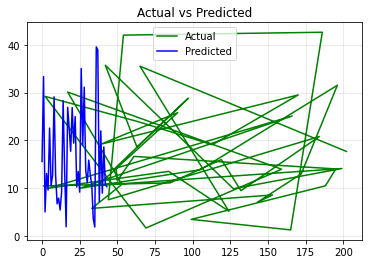

In [381]:
plt.plot(Y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [382]:
print("R^2 score: ", r2_score(Y_test,y_pred))

R^2 score:  0.9820403601589779


In [383]:
print("Mean squared error: ",test_score)

Mean squared error:  1.9206750466665412


In [384]:
matrix.append(["Невронска мрежа #3",r2_score(Y_test,y_pred).astype(float),mean_squared_error(Y_test,y_pred)])

*Овој модел дава подобри резултати од претходните два модели со невронски мрежи*

---

### 12.4.Четврт модел

In [385]:
X_train, X_test, Y_train, Y_test=make_copies()

In [386]:
model = Sequential()

model.add(Dense(64, input_dim=4, activation='linear'))
model.add(Dropout(0.2, input_shape=(128,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2, input_shape=(256,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2, input_shape=(512,)))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=100, batch_size=50,  verbose=1, validation_split=0.2)
y_pred = model.predict(X_test)
test_score=mean_squared_error(Y_test,y_pred)

Epoch 1/100
3/3 [==============================] - 1s 96ms/step - loss: 420.8204 - val_loss: 324.8066
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: 264.2183 - val_loss: 147.7545
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 137.9233 - val_loss: 184.0346
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 174.5963 - val_loss: 110.8116
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 113.9720 - val_loss: 101.8778
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 94.7111 - val_loss: 88.4798
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 76.9885 - val_loss: 55.7771
Epoch 8/100
3/3 [==============================] - 0s 23ms/step - loss: 57.1538 - val_loss: 44.1228
Epoch 9/100
3/3 [==============================] - 0s 19ms/step - loss: 47.8985 - val_loss: 25.9867
Epoch 10/100
3/3 [==============================] - 0s 20ms/step - loss: 28.8975 - val_los

In [387]:
y_pred = model.predict(X_test)

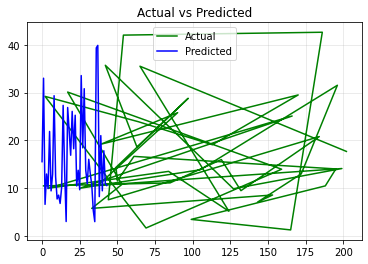

In [388]:
plt.plot(Y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [389]:
print("R^2 score: ", r2_score(Y_test,y_pred))

R^2 score:  0.9776790528476612


In [390]:
print("Mean squared error: ",test_score)

Mean squared error:  2.3870905314891755


In [391]:
matrix.append(["Невронска мрежа #4",r2_score(Y_test,y_pred).astype(float),mean_squared_error(Y_test,y_pred)])

*Овој модел дава слични резултати како претходниот*

---

### 12.5.Петти модел

In [392]:
X_train, X_test, Y_train, Y_test=make_copies()

In [393]:
model = Sequential()

model.add(Dense(128, input_dim=4, activation='linear'))
model.add(Dropout(0.2, input_shape=(128,)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2, input_shape=(128,)))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2, input_shape=(256,)))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=50, batch_size=25,  verbose=1, validation_split=0.2)
y_pred = model.predict(X_test)
test_score=mean_squared_error(Y_test,y_pred)

Epoch 1/50
6/6 [==============================] - 1s 35ms/step - loss: 389.2433 - val_loss: 286.4176
Epoch 2/50
6/6 [==============================] - 0s 10ms/step - loss: 216.6700 - val_loss: 134.1519
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 129.4104 - val_loss: 128.7855
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 106.5442 - val_loss: 73.3540
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 74.9570 - val_loss: 50.2683
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 52.1594 - val_loss: 26.9471
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 31.2964 - val_loss: 17.8398
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 28.0380 - val_loss: 17.5270
Epoch 9/50
6/6 [==============================] - 0s 9ms/step - loss: 28.7805 - val_loss: 17.7863
Epoch 10/50
6/6 [==============================] - 0s 9ms/step - loss: 24.0980 - val_loss: 14.2169
Epoch 11/5

In [394]:
y_pred = model.predict(X_test)

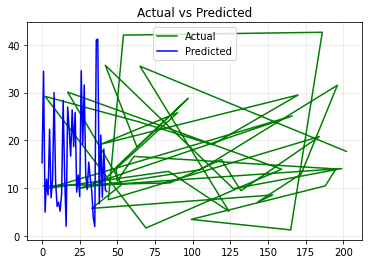

In [395]:
plt.plot(Y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [396]:
print("R^2 score: ", r2_score(Y_test,y_pred))

R^2 score:  0.9763901289653097


In [397]:
print("Mean squared error: ",test_score)

Mean squared error:  2.5249331586130412


In [398]:
matrix.append(["Невронска мрежа #5",r2_score(Y_test,y_pred).astype(float),mean_squared_error(Y_test,y_pred)])

*Овој модел е за нијанса полош од претходните два*

---

## 13.Заклучок

Во рамките на овој проект беше обработено податочното множество за процентуалната невработеност на млади лица (на возраст од 15 до 24 години) во 220 држави низ светот во периодот од 2010 до 2014 година.

Најпрво беше вчитан и прочистен дата сетот, а потоа беа направени различни дескриптивни и визуелни анализи над податоците. Потоа датасетот беше поделен на соодветни множества за тренирање и тестирање, при што таргет променливата беше процентот на невработени млади лица во 2014 година.

Во продолжение беа искористени различни модели од машинско учење за предвидување на вредностите, меѓу кои и: линеарна регресија, полиномна регресија, XGBoost, LightGBM, CatBoost и модели со невронски мрежи.

За евалуација на моделите се користеше R^2 Score и Mean Squared Error.

Во продолжение се сумирани резултатите и перформансите со сите модели:

In [400]:
result_df=pd.DataFrame(np.array(matrix),columns=['Модел', 'R^2 Score', 'Mean Squared Error'])
print(result_df)

                              Модел           R^2 Score  Mean Squared Error
0                Линеарна регресија  0.9910553470777943  0.9565766251911539
1   Полиномна регресија со степен 4   -47.6739351631383  5205.3834886693485
2   Полиномна регресија со степен 2  0.9670140517921552  3.5276480026470707
3                           XGBoost  0.9531358366786692   5.011839316988365
4                          LightGBM  0.9481200048603692   5.548252246031639
5                          CatBoost  0.9481200048603692   5.548252246031639
6                Невронска мрежа #1  0.9858672682163825  1.5114103355248778
7                Невронска мрежа #2  0.9859833873914288  1.4989920908426309
8                Невронска мрежа #3  0.9820403601589779  1.9206750466665412
9                Невронска мрежа #4  0.9776790528476612  2.3870905314891755
10               Невронска мрежа #5  0.9763901289653097  2.5249331586130412


Од горната табела може да се заклучи дека најдобри резултати даваат моделите со линеарна регресија и невронските мрежи, додека пак најлош модел е тој со полиномна регресија од степен 4.

Најдобар модел е моделот со линеарна регресија кој природно одговара на проблемот што се разгледува. Уште од визулени анализи можеше да се забележи дека постои јака линеарна зависност помеѓу променливите што налага дека линеарната регресија е погодна за решавање на овој проблем.

Најдобриот модел од невронските мрежи (невронска мрежа #2) е составен од секвенцијална невронска мрежба во која има три Dense и еден Dropout слој во кои има различен број на неврони (128 или 256), со една единствена активациска функција (relu), проследени со краен Dense слој со големина 1 и линеарна активациска функција.

За компајлирање на моделот е искористен adam оптимизаторот и mean squared error функцијата на грешка. Направени се 30 епохи и секој batch има големина 20.

Моделот со линеарна регресија може да се користи за проценка на процентуалната невработеност на младите лица и во следните години (2015-денес), притоа најдобро би било на почетокот од годината да се додадат вистинските вредности од претходната година со цел да се добијат уште подобри перформанси.

*Забелешка: при различни поделби на податоците се добиваат различни перформанси на моделите, но моделите со линеарна регресија и невронските мрежи секогаш даваат убедливо најдобри резултати, додека пак моделот со полиномна регресија од степен 4 секогаш дава најлоши резултати.*

Виктор Мегленовски - 191001


ФИНКИ - 05/2022

---